In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.size'] = 10

import sys
import os
# Turn off warnings and errors due to TF libraries
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
import time
import datetime
import csv
from random import shuffle
import tensorflow as tf
# import internal scripts

sys.path.insert(1, '/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/tools')
from tools import *

sys.path.insert(2, '/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking')

import configs
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import yaml

In [262]:
validation_path=r'/Users/lucascurtin/Desktop/SSH_LOGS/run 10-1/log_validation.csv'
validation_data = pd.read_csv(validation_path)
validation_loss=np.array(validation_data['loss'])
validation_accuracy=np.array(validation_data['accuracy'])

training_path=r'/Users/lucascurtin/Desktop/SSH_LOGS/run 10-1/log_training.csv'
training_data = pd.read_csv(training_path)
training_loss=np.array(training_data['loss'])
training_accuracy=np.array(training_data['accuracy'])

accuracy_3,precision_3,recall_3,f1_3=np.array(validation_data['accuracy_3']).astype(float),np.array(validation_data['precision_3']).astype(float), np.array(validation_data['recall_3']).astype(float),np.array(validation_data['f1_3']).astype(float)

accuracy_5,precision_5,recall_5,f1_5=np.array(validation_data['accuracy_5']).astype(float),np.array(validation_data['precision_5']).astype(float), np.array(validation_data['recall_5']).astype(float),np.array(validation_data['f1_5']).astype(float)

accuracy_7,precision_7,recall_7,f1_7=np.array(validation_data['accuracy_7']).astype(float),np.array(validation_data['precision_7']).astype(float),np.array(validation_data['recall_7']).astype(float),np.array(validation_data['f1_7']).astype(float)

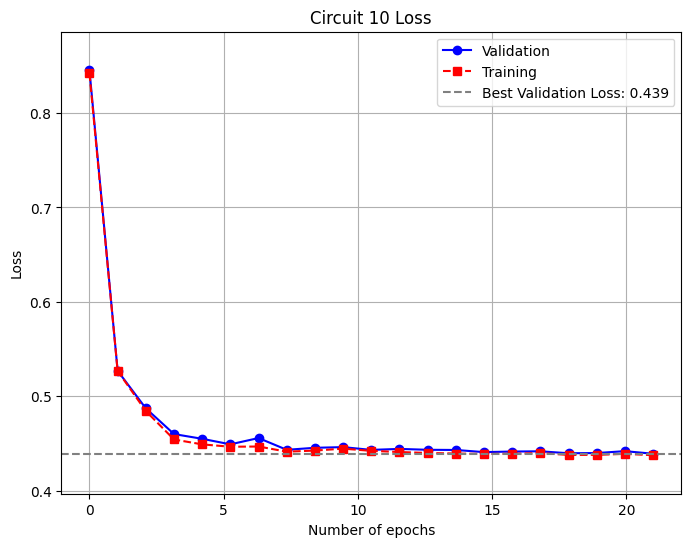

In [263]:
epochs = np.linspace(0, len(validation_loss), len(validation_loss))

plt.figure(figsize=(8, 6))

plt.plot(epochs, validation_loss, 'b-', label='Validation', marker='o')
plt.plot(epochs, training_loss, 'r--', label='Training', marker='s')

best_val_loss = min(validation_loss)
plt.axhline(best_val_loss, color='gray', linestyle='--', label=f'Best Validation Loss: {best_val_loss:.3f}')

plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Circuit 10 Loss")

# Set the y-axis limits based on the minimum and maximum of the data
ymin = min(min(validation_loss), min(training_loss))
ymax = max(max(validation_loss), max(training_loss))
yrange = ymax - ymin
plt.ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
plt.legend(loc='best')
plt.show()

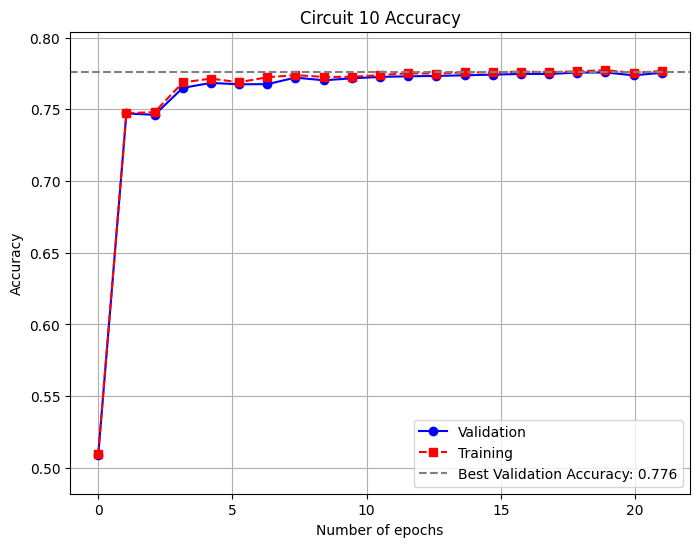

In [264]:
epochs = np.linspace(0, len(validation_accuracy), len(validation_accuracy))

plt.figure(figsize=(8, 6))

plt.plot(epochs, validation_accuracy, 'b-', label='Validation', marker='o')
plt.plot(epochs, training_accuracy, 'r--', label='Training', marker='s')

best_val_accuracy = max(validation_accuracy)
plt.axhline(best_val_accuracy, color='gray', linestyle='--', label=f'Best Validation Accuracy: {best_val_accuracy:.3f}')

plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Circuit 10 Accuracy")

# Set the y-axis limits based on the minimum and maximum of the data
ymin = min(min(validation_accuracy), min(training_accuracy))
ymax = max(max(validation_accuracy), max(training_accuracy))
yrange = ymax - ymin
plt.ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
plt.legend(loc='best')
plt.show()

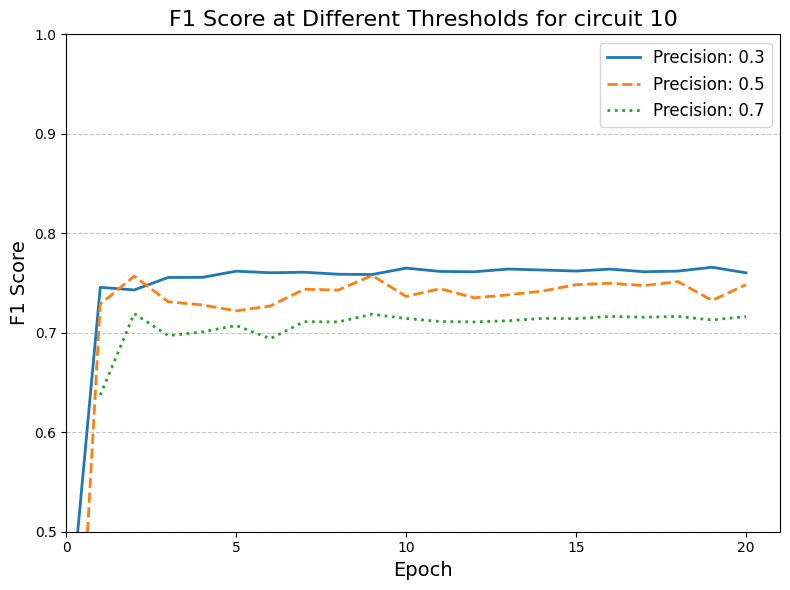

In [265]:
thresholds = [0.3, 0.5, 0.7]
f1_scores = [f1_3,
             f1_5,
             f1_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each precision
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot f1 scores for each precision
for i, precision in enumerate(thresholds):
    ax.plot(f1_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Precision: {precision}')

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)
ax.set_title('F1 Score at Different Thresholds for circuit 10', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)
ax.set_xticks(np.arange(0, len(f1_scores[0]), 5))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)


# Tighten layout
plt.tight_layout()

plt.show()

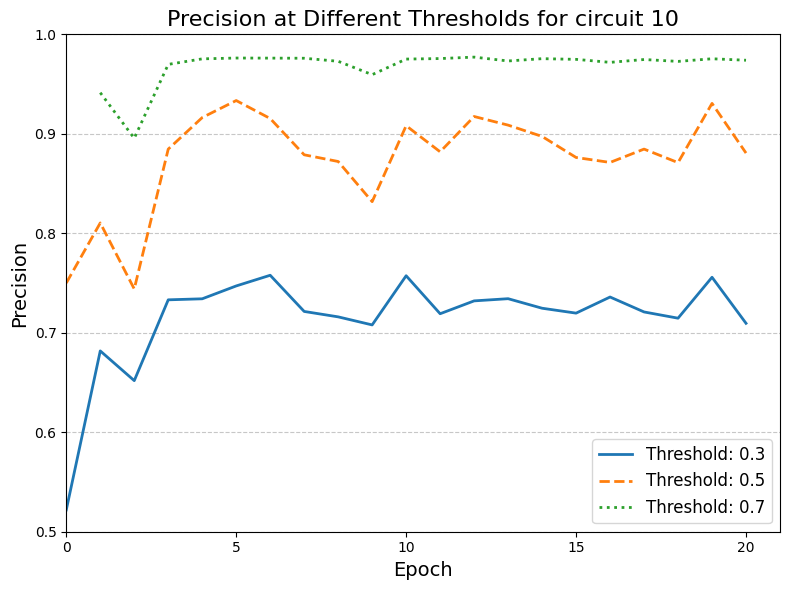

In [266]:
thresholds = [0.3, 0.5, 0.7]
precision_scores = [precision_3, precision_5, precision_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each threshold
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot precision scores for each threshold
for i, threshold in enumerate(thresholds):
    ax.plot(precision_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Threshold: {threshold}')

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision at Different Thresholds for circuit 10', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)
ax.set_xticks(np.arange(0, len(f1_scores[0]), 5))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)



# Tighten layout
plt.tight_layout()

plt.show()


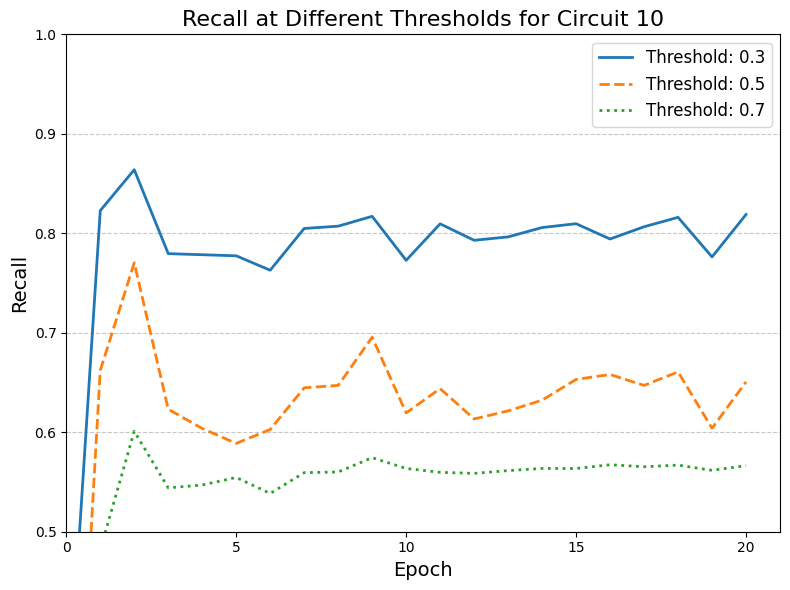

In [267]:
thresholds = [0.3, 0.5, 0.7]
recall_scores = [recall_3, recall_5, recall_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each threshold
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot recall scores for each threshold
for i, threshold in enumerate(thresholds):
    ax.plot(recall_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Threshold: {threshold}')

    # Find the index of the maximum recall score
    best_recall_idx = np.argmax(recall_scores[i])
    
   

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)
ax.set_title('Recall at Different Thresholds for Circuit 10', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)
ax.set_xticks(np.arange(0, len(f1_scores[0]), 5))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)



# Tighten layout
plt.tight_layout()

plt.show()


In [268]:
validation_path=r'/Users/lucascurtin/Desktop/SSH_LOGS/run MPS-3/log_validation.csv'
validation_data = pd.read_csv(validation_path)
validation_loss=np.array(validation_data['loss'])
validation_accuracy=np.array(validation_data['accuracy'])
training_path=r'/Users/lucascurtin/Desktop/SSH_LOGS/run MPS-3/log_training.csv'
training_data = pd.read_csv(training_path)
training_loss=np.array(training_data['loss'])
training_accuracy=np.array(training_data['accuracy'])
accuracy_3,precision_3,recall_3,f1_3=np.array(validation_data['accuracy_3']).astype(float),np.array(validation_data['precision_3']).astype(float), np.array(validation_data['recall_3']).astype(float),np.array(validation_data['f1_3']).astype(float)

accuracy_5,precision_5,recall_5,f1_5=np.array(validation_data['accuracy_5']).astype(float),np.array(validation_data['precision_5']).astype(float), np.array(validation_data['recall_5']).astype(float),np.array(validation_data['f1_5']).astype(float)

accuracy_7,precision_7,recall_7,f1_7=np.array(validation_data['accuracy_7']).astype(float),np.array(validation_data['precision_7']).astype(float),np.array(validation_data['recall_7']).astype(float),np.array(validation_data['f1_7']).astype(float)

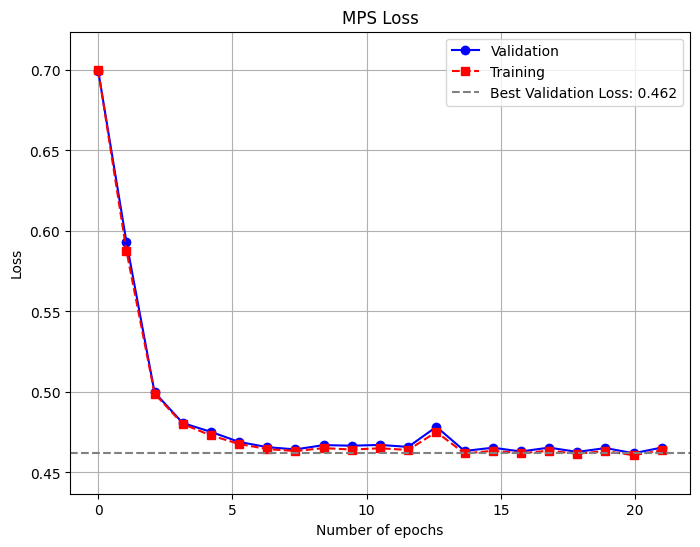

In [269]:
epochs = np.linspace(0, len(validation_loss), len(validation_loss))

plt.figure(figsize=(8, 6))

plt.plot(epochs, validation_loss, 'b-', label='Validation', marker='o')
plt.plot(epochs, training_loss, 'r--', label='Training', marker='s')

best_val_loss = min(validation_loss)
plt.axhline(best_val_loss, color='gray', linestyle='--', label=f'Best Validation Loss: {best_val_loss:.3f}')

plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("MPS Loss")

# Set the y-axis limits based on the minimum and maximum of the data
ymin = min(min(validation_loss), min(training_loss))
ymax = max(max(validation_loss), max(training_loss))
yrange = ymax - ymin
plt.ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
plt.legend(loc='best')
plt.show()

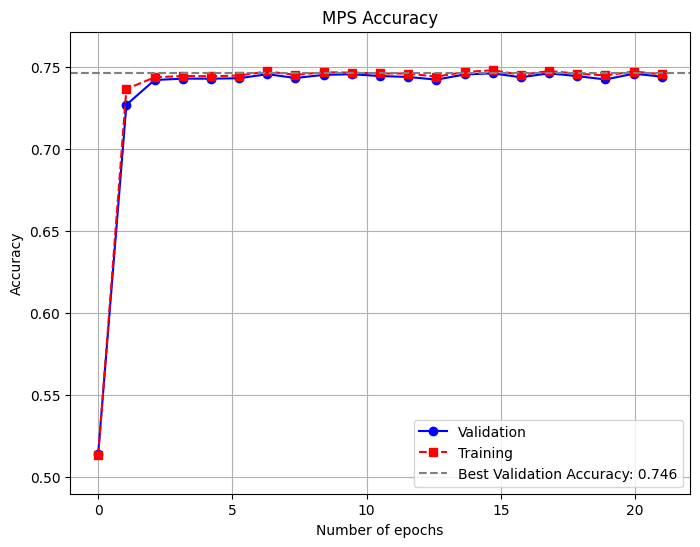

In [270]:
epochs = np.linspace(0, len(validation_accuracy), len(validation_accuracy))

plt.figure(figsize=(8, 6))

plt.plot(epochs, validation_accuracy, 'b-', label='Validation', marker='o')
plt.plot(epochs, training_accuracy, 'r--', label='Training', marker='s')

best_val_accuracy = max(validation_accuracy)
plt.axhline(best_val_accuracy, color='gray', linestyle='--', label=f'Best Validation Accuracy: {best_val_accuracy:.3f}')

plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("MPS Accuracy")

# Set the y-axis limits based on the minimum and maximum of the data
ymin = min(min(validation_accuracy), min(training_accuracy))
ymax = max(max(validation_accuracy), max(training_accuracy))
yrange = ymax - ymin
plt.ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
plt.legend(loc='best')
plt.show()

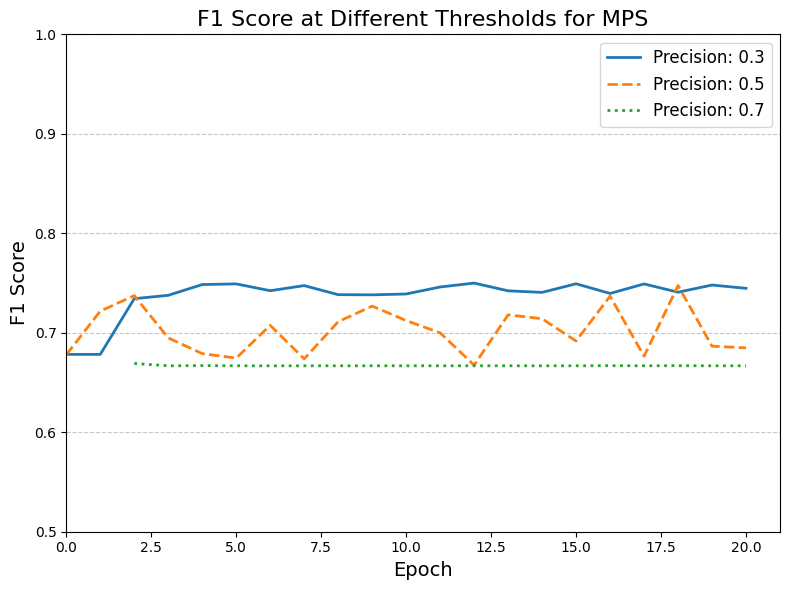

In [271]:
thresholds = [0.3, 0.5, 0.7]
f1_scores = [f1_3,
             f1_5,
             f1_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each precision
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot f1 scores for each precision
for i, precision in enumerate(thresholds):
    ax.plot(f1_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Precision: {precision}')

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)
ax.set_title('F1 Score at Different Thresholds for MPS', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)


# Tighten layout
plt.tight_layout()

plt.show()

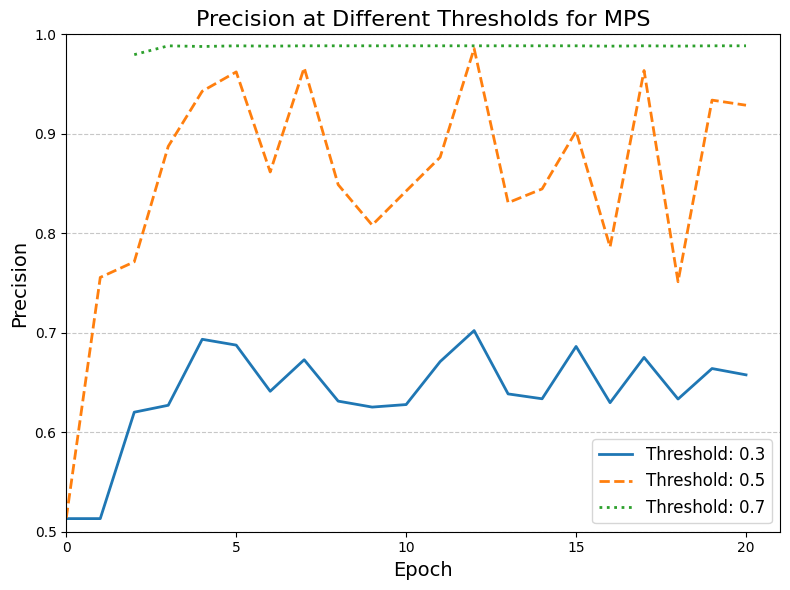

In [272]:
thresholds = [0.3, 0.5, 0.7]
precision_scores = [precision_3, precision_5, precision_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each threshold
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot precision scores for each threshold
for i, threshold in enumerate(thresholds):
    ax.plot(precision_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Threshold: {threshold}')

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision at Different Thresholds for MPS', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)
ax.set_xticks(np.arange(0, len(f1_scores[0]), 5))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)



# Tighten layout
plt.tight_layout()

plt.show()


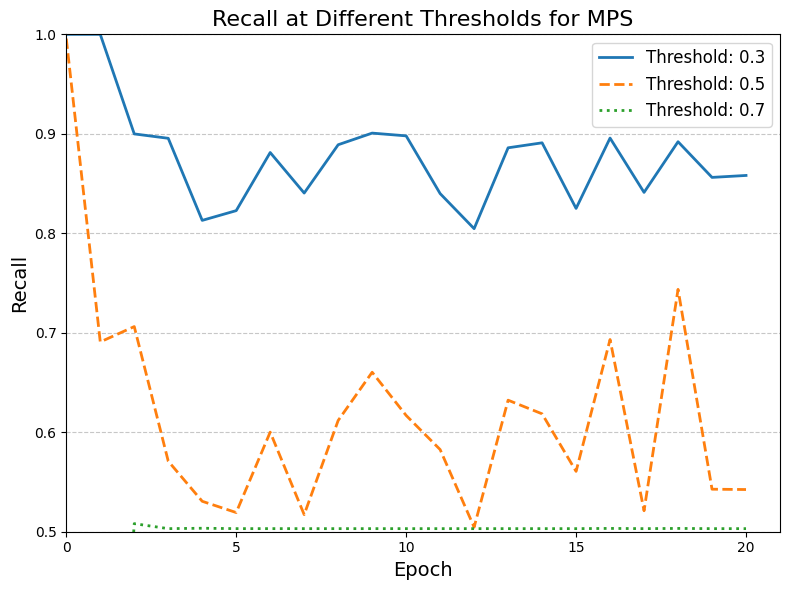

In [273]:
thresholds = [0.3, 0.5, 0.7]
recall_scores = [recall_3, recall_5, recall_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each threshold
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot recall scores for each threshold
for i, threshold in enumerate(thresholds):
    ax.plot(recall_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Threshold: {threshold}')

    # Find the index of the maximum recall score
    best_recall_idx = np.argmax(recall_scores[i])
    
   
    

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)
ax.set_title('Recall at Different Thresholds for MPS', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)
ax.set_xticks(np.arange(0, len(f1_scores[0]), 5))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)



# Tighten layout
plt.tight_layout()

plt.show()


In [274]:
validation_path=r'/Users/lucascurtin/Desktop/SSH_LOGS/run TTN-1/log_validation.csv'
validation_data = pd.read_csv(validation_path)
validation_loss=np.array(validation_data['loss'])
validation_accuracy=np.array(validation_data['accuracy'])
training_path=r'/Users/lucascurtin/Desktop/SSH_LOGS/run TTN-1/log_training.csv'
training_data = pd.read_csv(training_path)
training_loss=np.array(training_data['loss'])
training_accuracy=np.array(training_data['accuracy'])
accuracy_3,precision_3,recall_3,f1_3=np.array(validation_data['accuracy_3']).astype(float),np.array(validation_data['precision_3']).astype(float), np.array(validation_data['recall_3']).astype(float),np.array(validation_data['f1_3']).astype(float)

accuracy_5,precision_5,recall_5,f1_5=np.array(validation_data['accuracy_5']).astype(float),np.array(validation_data['precision_5']).astype(float), np.array(validation_data['recall_5']).astype(float),np.array(validation_data['f1_5']).astype(float)

accuracy_7,precision_7,recall_7,f1_7=np.array(validation_data['accuracy_7']).astype(float),np.array(validation_data['precision_7']).astype(float),np.array(validation_data['recall_7']).astype(float),np.array(validation_data['f1_7']).astype(float)

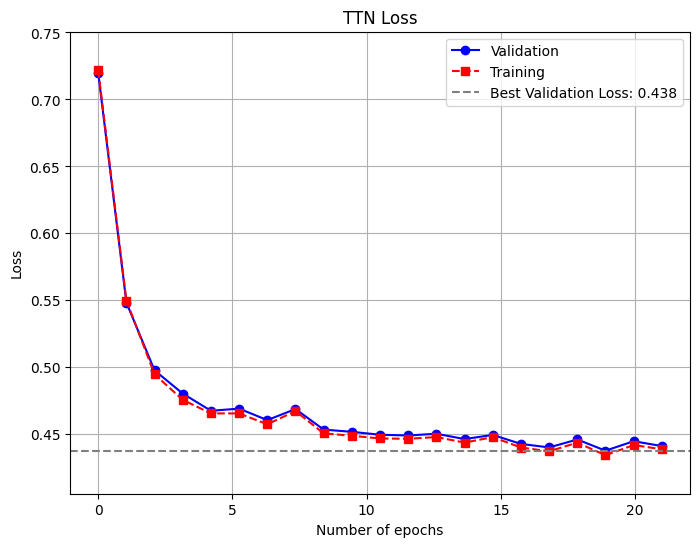

In [275]:
epochs = np.linspace(0, len(validation_loss), len(validation_loss))

plt.figure(figsize=(8, 6))

plt.plot(epochs, validation_loss, 'b-', label='Validation', marker='o')
plt.plot(epochs, training_loss, 'r--', label='Training', marker='s')

best_val_loss = min(validation_loss)
plt.axhline(best_val_loss, color='gray', linestyle='--', label=f'Best Validation Loss: {best_val_loss:.3f}')

plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("TTN Loss")

# Set the y-axis limits based on the minimum and maximum of the data
ymin = min(min(validation_loss), min(training_loss))
ymax = max(max(validation_loss), max(training_loss))
yrange = ymax - ymin
plt.ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
plt.legend(loc='best')
plt.show()

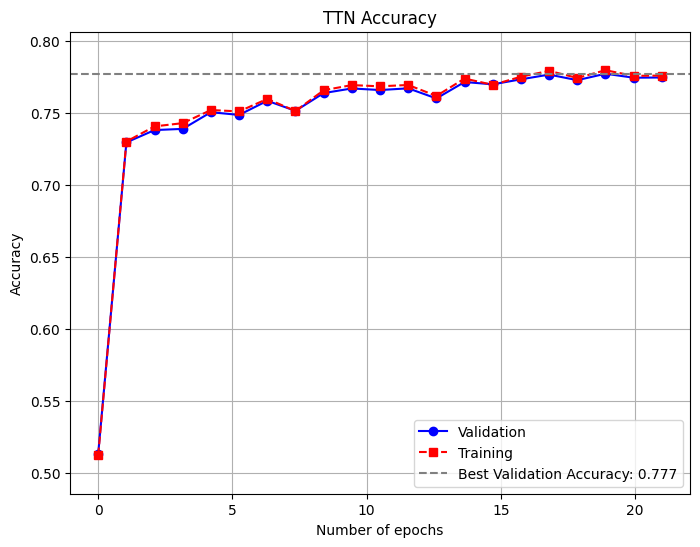

In [276]:
epochs = np.linspace(0, len(validation_accuracy), len(validation_accuracy))

plt.figure(figsize=(8, 6))

plt.plot(epochs, validation_accuracy, 'b-', label='Validation', marker='o')
plt.plot(epochs, training_accuracy, 'r--', label='Training', marker='s')

best_val_accuracy = max(validation_accuracy)
plt.axhline(best_val_accuracy, color='gray', linestyle='--', label=f'Best Validation Accuracy: {best_val_accuracy:.3f}')

plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("TTN Accuracy")

# Set the y-axis limits based on the minimum and maximum of the data
ymin = min(min(validation_accuracy), min(training_accuracy))
ymax = max(max(validation_accuracy), max(training_accuracy))
yrange = ymax - ymin
plt.ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
plt.legend(loc='best')
plt.show()

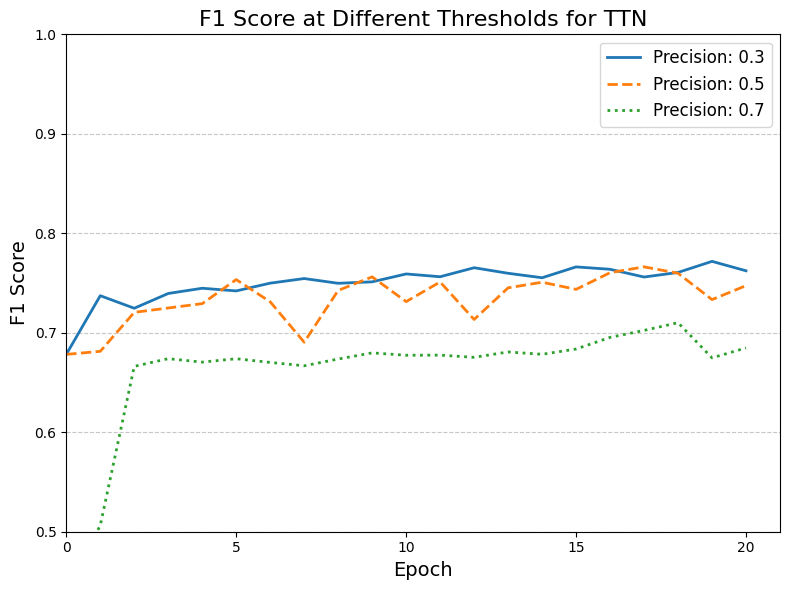

In [277]:
thresholds = [0.3, 0.5, 0.7]
f1_scores = [f1_3,
             f1_5,
             f1_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each precision
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot f1 scores for each precision
for i, precision in enumerate(thresholds):
    ax.plot(f1_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Precision: {precision}')

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)
ax.set_title('F1 Score at Different Thresholds for TTN', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)
ax.set_xticks(np.arange(0, len(f1_scores[0]), 5))


# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)


# Tighten layout
plt.tight_layout()

plt.show()

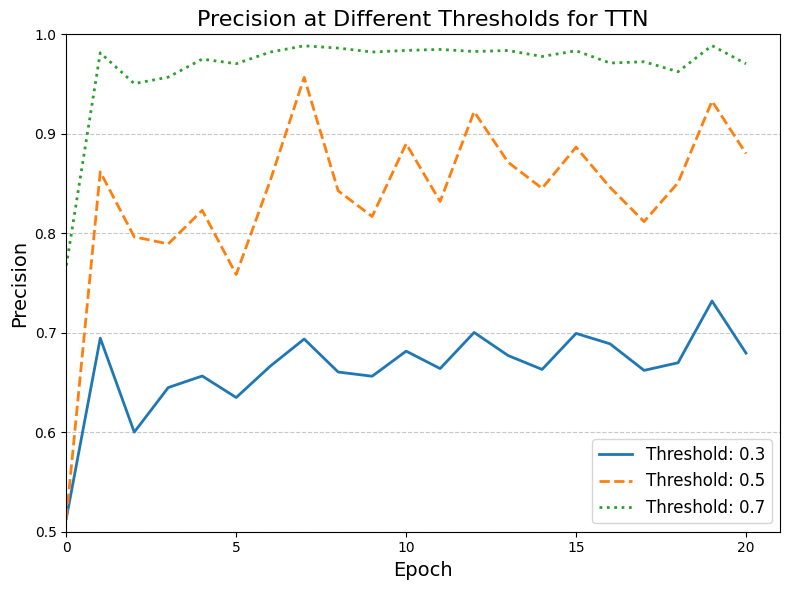

In [278]:
thresholds = [0.3, 0.5, 0.7]
precision_scores = [precision_3, precision_5, precision_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each threshold
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot precision scores for each threshold
for i, threshold in enumerate(thresholds):
    ax.plot(precision_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Threshold: {threshold}')

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision at Different Thresholds for TTN', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)
ax.set_xticks(np.arange(0, len(f1_scores[0]), 5))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)



# Tighten layout
plt.tight_layout()

plt.show()


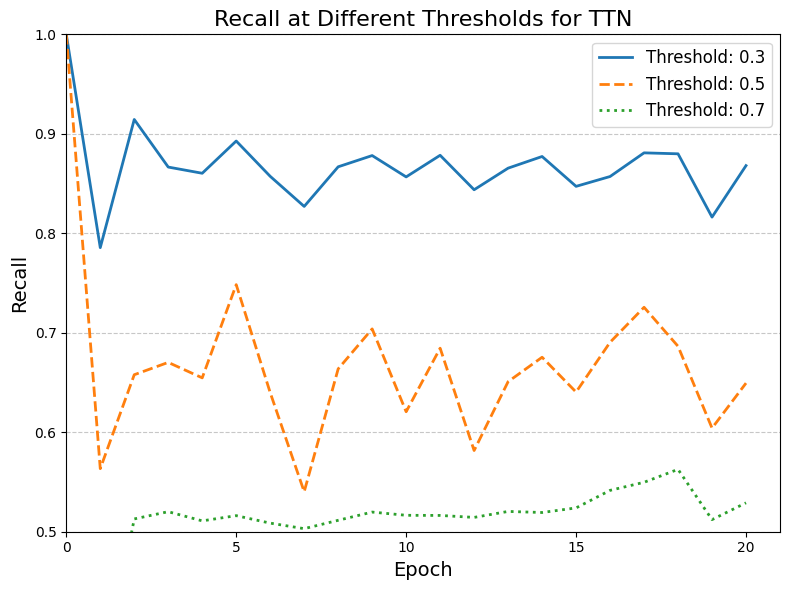

In [279]:
thresholds = [0.3, 0.5, 0.7]
recall_scores = [recall_3, recall_5, recall_7]

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Define line styles and colors for each threshold
line_styles = ['-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot recall scores for each threshold
for i, threshold in enumerate(thresholds):
    ax.plot(recall_scores[i], 
            linestyle=line_styles[i], 
            color=colors[i],
            linewidth=2,
            label=f'Threshold: {threshold}')

   
    

# Add axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)
ax.set_title('Recall at Different Thresholds for TTN', fontsize=16)

# Set axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0.5, top=1)
ax.set_xticks(np.arange(0, len(f1_scores[0]), 5))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)



# Tighten layout
plt.tight_layout()

plt.show()
